In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!pip install plotly

In [3]:
import plotly.express as px

In [4]:
r09 = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter08/Datasets/online_retail_II.csv')
r09.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [5]:
r10 = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter08/Datasets/online_retail_II2.csv')
r10.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [6]:
dfs = [r09, r10]
retail = pd.concat(dfs, keys = ['09-10', '10-11'])
retail

Invoice StockCode                          Description  Quantity  \
09-10 0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
      1       489434    79323P                   PINK CHERRY LIGHTS        12   
      2       489434    79323W                  WHITE CHERRY LIGHTS        12   
      3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
      4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...              ...       ...                                  ...       ...   
10-11 541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
      541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
      541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
      541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
      541909  581587      POST                              POSTAGE         1   

                   InvoiceDate  Price  Customer ID         Country  
09-10 0       01/12/2009 07:45   6.95      13085.0  United Kingdom  
      1       01/12/2009 07:45   6.75      13085.0  United Kingdom  
      2       01/12/2009 07:45   6.75      13085.0  United Kingdom  
      3       01/12/2009 07:45   2.10      13085.0  United Kingdom  
      4       01/12/2009 07:45   1.25      13085.0  United Kingdom  
...                        ...    ...          ...             ...  
10-11 541905  09/12/2011 12:50   2.10      12680.0          France  
      541906  09/12/2011 12:50   4.15      12680.0          France  
      541907  09/12/2011 12:50   4.15      12680.0          France  
      541908  09/12/2011 12:50   4.95      12680.0          France  
      541909  09/12/2011 12:50  18.00      12680.0          France  

[1067371 rows x 8 columns]

In [7]:
retail.rename(index = str, columns = {
    'Invoice' : 'invoice', 
    'StockCode' : 'stock_code', 
    'Quantity' : 'quantity', 
    'InvoiceDate' : 'date', 
    'Price' : 'unit_price', 
    'Country' : 'country', 
    'Description' : 'desc', 
    'Customer ID' : 'cust_id'
}, inplace = True)

retail.head()

invoice stock_code                                 desc  quantity  \
09-10 0  489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
      1  489434     79323P                   PINK CHERRY LIGHTS        12   
      2  489434     79323W                  WHITE CHERRY LIGHTS        12   
      3  489434      22041         RECORD FRAME 7" SINGLE SIZE         48   
      4  489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24   

                     date  unit_price  cust_id         country  
09-10 0  01/12/2009 07:45        6.95  13085.0  United Kingdom  
      1  01/12/2009 07:45        6.75  13085.0  United Kingdom  
      2  01/12/2009 07:45        6.75  13085.0  United Kingdom  
      3  01/12/2009 07:45        2.10  13085.0  United Kingdom  
      4  01/12/2009 07:45        1.25  13085.0  United Kingdom

In [8]:
retail.isnull().sum().sort_values(ascending = False)

cust_id       243007
desc            4382
country            0
unit_price         0
date               0
quantity           0
stock_code         0
invoice            0
dtype: int64

In [9]:
retail.describe()

,quantity,unit_price,cust_id
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [10]:
retail.loc[retail['unit_price'] == 38970.0]

,,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
10-11,222681,C556445,M,Manual,-1,10/06/2011 15:31,38970.0,15098.0,United Kingdom


In [11]:
retail.loc[retail['unit_price'] == -53594.360000]

,,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
09-10,179403,A506401,B,Adjust bad debt,1,29/04/2010 13:36,-53594.36,NaN,United Kingdom


In [12]:
(retail['unit_price'] <= 0).sum()

6207

In [13]:
(retail['quantity'] <= 0).sum()

22950

In [14]:
retail[(retail['unit_price'] <= 0) & (retail['quantity'] <= 0) & (retail['cust_id'].isnull())]

invoice stock_code          desc  quantity              date  \
09-10 263     489464      21733  85123a mixed       -96  01/12/2009 10:52   
      283     489463      71477         short      -240  01/12/2009 10:52   
      284     489467     85123A   21733 mixed      -192  01/12/2009 10:53   
      470     489521      21646           NaN       -50  01/12/2009 11:44   
      3114    489655      20683           NaN       -44  01/12/2009 17:26   
...              ...        ...           ...       ...               ...   
10-11 535333  581210      23395         check       -26  07/12/2011 18:36   
      535335  581212      22578          lost     -1050  07/12/2011 18:38   
      535336  581213      22576         check       -30  07/12/2011 18:38   
      536910  581226      23090       missing      -338  08/12/2011 09:56   
      538925  581422      23169       smashed      -235  08/12/2011 15:24   

              unit_price  cust_id         country  
09-10 263            0.0      NaN  United Kingdom  
      283            0.0      NaN  United Kingdom  
      284            0.0      NaN  United Kingdom  
      470            0.0      NaN  United Kingdom  
      3114           0.0      NaN  United Kingdom  
...                  ...      ...             ...  
10-11 535333         0.0      NaN  United Kingdom  
      535335         0.0      NaN  United Kingdom  
      535336         0.0      NaN  United Kingdom  
      536910         0.0      NaN  United Kingdom  
      538925         0.0      NaN  United Kingdom  

[3457 rows x 8 columns]

In [15]:
null_retail = retail[retail.isnull().any(axis=1)]
null_retail

invoice stock_code                            desc  quantity  \
09-10 263     489464      21733                    85123a mixed       -96   
      283     489463      71477                           short      -240   
      284     489467     85123A                     21733 mixed      -192   
      470     489521      21646                             NaN       -50   
      577     489525     85226C       BLUE PULL BACK RACING CAR         1   
...              ...        ...                             ...       ...   
10-11 541536  581498     85099B         JUMBO BAG RED RETROSPOT         5   
      541537  581498     85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
      541538  581498      85150   LADIES & GENTLEMEN METAL SIGN         1   
      541539  581498      85174               S/4 CACTI CANDLES         1   
      541540  581498        DOT                  DOTCOM POSTAGE         1   

                          date  unit_price  cust_id         country  
09-10 263     01/12/2009 10:52        0.00      NaN  United Kingdom  
      283     01/12/2009 10:52        0.00      NaN  United Kingdom  
      284     01/12/2009 10:53        0.00      NaN  United Kingdom  
      470     01/12/2009 11:44        0.00      NaN  United Kingdom  
      577     01/12/2009 11:49        0.55      NaN  United Kingdom  
...                        ...         ...      ...             ...  
10-11 541536  09/12/2011 10:26        4.13      NaN  United Kingdom  
      541537  09/12/2011 10:26        4.13      NaN  United Kingdom  
      541538  09/12/2011 10:26        4.96      NaN  United Kingdom  
      541539  09/12/2011 10:26       10.79      NaN  United Kingdom  
      541540  09/12/2011 10:26     1714.17      NaN  United Kingdom  

[243007 rows x 8 columns]

In [16]:
new_retail = retail[(retail['unit_price'] > 0) & (retail['quantity'] > 0)]

In [17]:
new_retail.describe()

,quantity,unit_price,cust_id
count,1.041671e+06,1.041671e+06,805549.000000
mean,1.096345e+01,4.077038e+00,15331.954970
std,1.265149e+02,5.144898e+01,1696.737039
min,1.000000e+00,1.000000e-03,12346.000000
25%,1.000000e+00,1.250000e+00,13982.000000
50%,3.000000e+00,2.100000e+00,15271.000000
75%,1.000000e+01,4.130000e+00,16805.000000
max,8.099500e+04,2.511109e+04,18287.000000


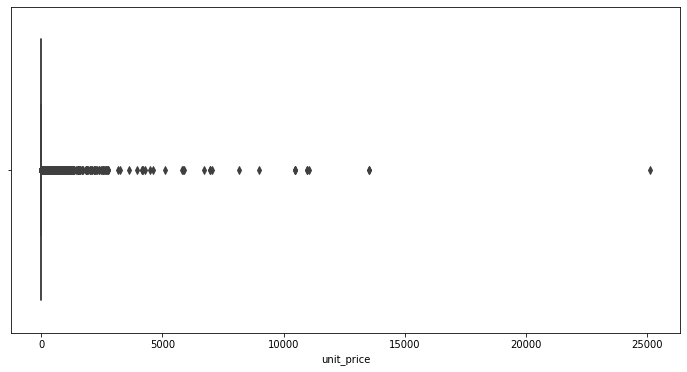

In [18]:
plt.subplots(figsize = (12, 6))
up = sns.boxplot(new_retail.unit_price)

In [19]:
new_retail = new_retail[new_retail.unit_price < 15000]

In [20]:
new_retail.describe()

,quantity,unit_price,cust_id
count,1.041670e+06,1.041670e+06,805549.000000
mean,1.096346e+01,4.052935e+00,15331.954970
std,1.265150e+02,4.518687e+01,1696.737039
min,1.000000e+00,1.000000e-03,12346.000000
25%,1.000000e+00,1.250000e+00,13982.000000
50%,3.000000e+00,2.100000e+00,15271.000000
75%,1.000000e+01,4.130000e+00,16805.000000
max,8.099500e+04,1.354133e+04,18287.000000


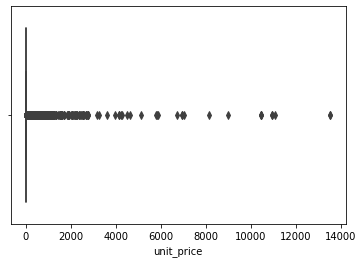

In [21]:
up_new = sns.boxplot(new_retail.unit_price)

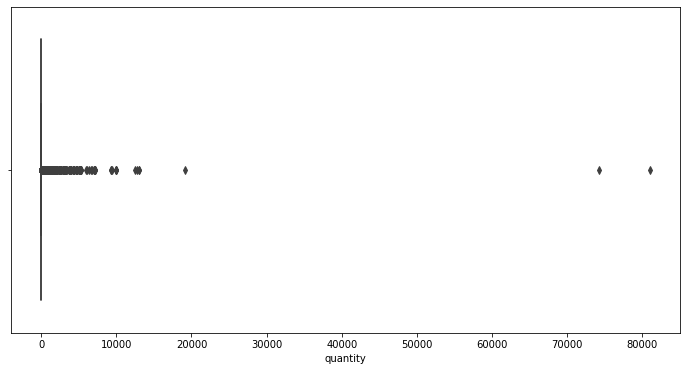

In [22]:
plt.subplots(figsize = (12, 6))
q = sns.boxplot(new_retail.quantity)

In [23]:
new_retail = new_retail[new_retail.quantity < 25000]

In [24]:
new_retail.describe()

,quantity,unit_price,cust_id
count,1.041668e+06,1.041668e+06,805547.000000
mean,1.081448e+01,4.052940e+00,15331.957294
std,6.651307e+01,4.518691e+01,1696.735430
min,1.000000e+00,1.000000e-03,12346.000000
25%,1.000000e+00,1.250000e+00,13982.000000
50%,3.000000e+00,2.100000e+00,15271.000000
75%,1.000000e+01,4.130000e+00,16805.000000
max,1.915200e+04,1.354133e+04,18287.000000


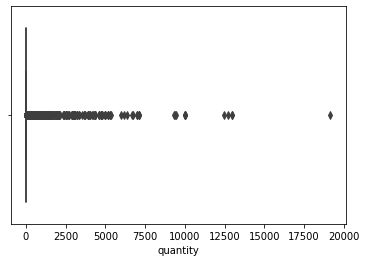

In [25]:
q_new = sns.boxplot(new_retail.quantity)

In [26]:
new_retail[(new_retail.desc.isnull()) & (new_retail.cust_id.isnull())]

,,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country


In [27]:
new_retail.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1041668 entries, (09-10, 0) to (10-11, 541909)
Data columns (total 8 columns):
invoice       1041668 non-null object
stock_code    1041668 non-null object
desc          1041668 non-null object
quantity      1041668 non-null int64
date          1041668 non-null object
unit_price    1041668 non-null float64
cust_id       805547 non-null float64
country       1041668 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 72.7+ MB


In [28]:
new_retail = new_retail.dropna()
new_retail.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 805547 entries, (09-10, 0) to (10-11, 541909)
Data columns (total 8 columns):
invoice       805547 non-null object
stock_code    805547 non-null object
desc          805547 non-null object
quantity      805547 non-null int64
date          805547 non-null object
unit_price    805547 non-null float64
cust_id       805547 non-null float64
country       805547 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 57.1+ MB


In [29]:
retail = new_retail
retail.head()

invoice stock_code                                 desc  quantity  \
09-10 0  489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
      1  489434     79323P                   PINK CHERRY LIGHTS        12   
      2  489434     79323W                  WHITE CHERRY LIGHTS        12   
      3  489434      22041         RECORD FRAME 7" SINGLE SIZE         48   
      4  489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24   

                     date  unit_price  cust_id         country  
09-10 0  01/12/2009 07:45        6.95  13085.0  United Kingdom  
      1  01/12/2009 07:45        6.75  13085.0  United Kingdom  
      2  01/12/2009 07:45        6.75  13085.0  United Kingdom  
      3  01/12/2009 07:45        2.10  13085.0  United Kingdom  
      4  01/12/2009 07:45        1.25  13085.0  United Kingdom

In [30]:
retail.desc = retail.desc.str.lower()
retail.head()

invoice stock_code                                 desc  quantity  \
09-10 0  489434      85048  15cm christmas glass ball 20 lights        12   
      1  489434     79323P                   pink cherry lights        12   
      2  489434     79323W                  white cherry lights        12   
      3  489434      22041         record frame 7" single size         48   
      4  489434      21232       strawberry ceramic trinket box        24   

                     date  unit_price  cust_id         country  
09-10 0  01/12/2009 07:45        6.95  13085.0  United Kingdom  
      1  01/12/2009 07:45        6.75  13085.0  United Kingdom  
      2  01/12/2009 07:45        6.75  13085.0  United Kingdom  
      3  01/12/2009 07:45        2.10  13085.0  United Kingdom  
      4  01/12/2009 07:45        1.25  13085.0  United Kingdom

In [31]:
retail['date'] = pd.to_datetime(retail.date, format = '%d/%m/%Y %H:%M')
retail.head()

invoice stock_code                                 desc  quantity  \
09-10 0  489434      85048  15cm christmas glass ball 20 lights        12   
      1  489434     79323P                   pink cherry lights        12   
      2  489434     79323W                  white cherry lights        12   
      3  489434      22041         record frame 7" single size         48   
      4  489434      21232       strawberry ceramic trinket box        24   

                       date  unit_price  cust_id         country  
09-10 0 2009-12-01 07:45:00        6.95  13085.0  United Kingdom  
      1 2009-12-01 07:45:00        6.75  13085.0  United Kingdom  
      2 2009-12-01 07:45:00        6.75  13085.0  United Kingdom  
      3 2009-12-01 07:45:00        2.10  13085.0  United Kingdom  
      4 2009-12-01 07:45:00        1.25  13085.0  United Kingdom

In [32]:
retail.insert(loc = 4, column = 'year_month', value = retail.date.map(lambda x: 100 * x.year + x.month))
retail.insert(loc = 5, column = 'year', value = retail.date.dt.year)
retail.insert(loc = 6, column = 'month', value = retail.date.dt.month)
retail.insert(loc = 7, column = 'day', value = retail.date.dt.day)
retail.insert(loc = 8, column ='hour', value = retail.date.dt.hour)
retail.insert(loc = 9, column='day_of_week', value=(retail.date.dt.dayofweek)+1)
retail.head()

invoice stock_code                                 desc  quantity  \
09-10 0  489434      85048  15cm christmas glass ball 20 lights        12   
      1  489434     79323P                   pink cherry lights        12   
      2  489434     79323W                  white cherry lights        12   
      3  489434      22041         record frame 7" single size         48   
      4  489434      21232       strawberry ceramic trinket box        24   

         year_month  year  month  day  hour  day_of_week                date  \
09-10 0      200912  2009     12    1     7            2 2009-12-01 07:45:00   
      1      200912  2009     12    1     7            2 2009-12-01 07:45:00   
      2      200912  2009     12    1     7            2 2009-12-01 07:45:00   
      3      200912  2009     12    1     7            2 2009-12-01 07:45:00   
      4      200912  2009     12    1     7            2 2009-12-01 07:45:00   

         unit_price  cust_id         country  
09-10 0        6.95  13085.0  United Kingdom  
      1        6.75  13085.0  United Kingdom  
      2        6.75  13085.0  United Kingdom  
      3        2.10  13085.0  United Kingdom  
      4        1.25  13085.0  United Kingdom

In [33]:
retail.insert(loc = 11, column = 'spent', value = (retail['quantity'] * retail['unit_price']))
retail.head()

invoice stock_code                                 desc  quantity  \
09-10 0  489434      85048  15cm christmas glass ball 20 lights        12   
      1  489434     79323P                   pink cherry lights        12   
      2  489434     79323W                  white cherry lights        12   
      3  489434      22041         record frame 7" single size         48   
      4  489434      21232       strawberry ceramic trinket box        24   

         year_month  year  month  day  hour  day_of_week                date  \
09-10 0      200912  2009     12    1     7            2 2009-12-01 07:45:00   
      1      200912  2009     12    1     7            2 2009-12-01 07:45:00   
      2      200912  2009     12    1     7            2 2009-12-01 07:45:00   
      3      200912  2009     12    1     7            2 2009-12-01 07:45:00   
      4      200912  2009     12    1     7            2 2009-12-01 07:45:00   

         spent  unit_price  cust_id         country  
09-10 0   83.4        6.95  13085.0  United Kingdom  
      1   81.0        6.75  13085.0  United Kingdom  
      2   81.0        6.75  13085.0  United Kingdom  
      3  100.8        2.10  13085.0  United Kingdom  
      4   30.0        1.25  13085.0  United Kingdom

In [34]:
retail = retail[['invoice', 'country', 'cust_id', 'stock_code', 'desc','quantity', 'unit_price', 'date', 'spent', 
                 'year_month', 'year', 'month', 'day', 'day_of_week', 'hour']]
retail.head()

invoice         country  cust_id stock_code  \
09-10 0  489434  United Kingdom  13085.0      85048   
      1  489434  United Kingdom  13085.0     79323P   
      2  489434  United Kingdom  13085.0     79323W   
      3  489434  United Kingdom  13085.0      22041   
      4  489434  United Kingdom  13085.0      21232   

                                        desc  quantity  unit_price  \
09-10 0  15cm christmas glass ball 20 lights        12        6.95   
      1                   pink cherry lights        12        6.75   
      2                  white cherry lights        12        6.75   
      3         record frame 7" single size         48        2.10   
      4       strawberry ceramic trinket box        24        1.25   

                       date  spent  year_month  year  month  day  day_of_week  \
09-10 0 2009-12-01 07:45:00   83.4      200912  2009     12    1            2   
      1 2009-12-01 07:45:00   81.0      200912  2009     12    1            2   
      2 2009-12-01 07:45:00   81.0      200912  2009     12    1            2   
      3 2009-12-01 07:45:00  100.8      200912  2009     12    1            2   
      4 2009-12-01 07:45:00   30.0      200912  2009     12    1            2   

         hour  
09-10 0     7  
      1     7  
      2     7  
      3     7  
      4     7

In [35]:
#orders made by each customer

ord_cust = retail.groupby(by = ['cust_id', 'country'], as_index = False)['invoice'].count()
ord_cust.head(10)

,cust_id,country,invoice
0,12346.0,United Kingdom,33
1,12347.0,Iceland,253
2,12348.0,Finland,51
3,12349.0,Italy,175
4,12350.0,Norway,17
5,12351.0,Unspecified,21
6,12352.0,Norway,103
7,12353.0,Bahrain,24
8,12354.0,Spain,58
9,12355.0,Bahrain,35


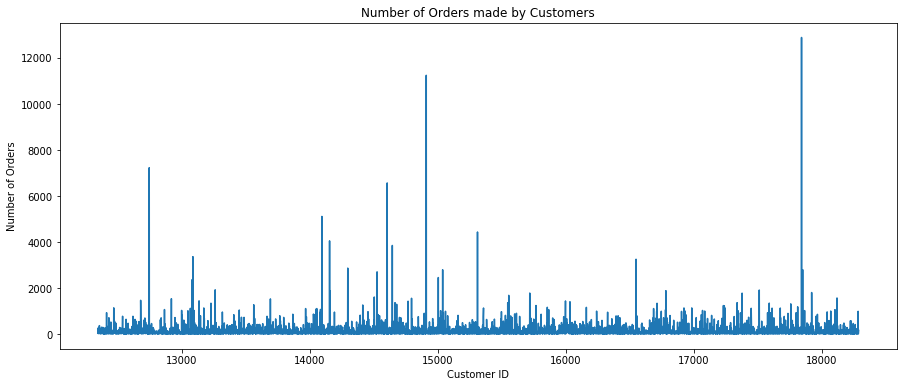

In [36]:
plt.subplots(figsize = (15, 6))
oc = plt.plot(ord_cust.cust_id, ord_cust.invoice)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders made by Customers')
plt.show()

In [37]:
ord_cust.describe()

,cust_id,invoice
count,5891.000000,5891.000000
mean,15309.025632,136.741979
std,1718.894226,353.448622
min,12346.000000,1.000000
25%,13823.500000,21.000000
50%,15308.000000,53.000000
75%,16794.500000,142.000000
max,18287.000000,12890.000000


In [38]:
# 5 customers who ordered the most number of times
ord_cust.sort_values(by = 'invoice', ascending = False).head()

,cust_id,country,invoice
5446,17841.0,United Kingdom,12890
2551,14911.0,EIRE,11245
413,12748.0,United Kingdom,7228
2250,14606.0,United Kingdom,6566
1744,14096.0,United Kingdom,5111


In [39]:
# money spent 
spent_cust = retail.groupby(by = ['cust_id', 'country'], as_index = False)['spent'].sum()
spent_cust.head()

,cust_id,country,spent
0,12346.0,United Kingdom,372.86
1,12347.0,Iceland,5633.32
2,12348.0,Finland,2019.40
3,12349.0,Italy,4428.69
4,12350.0,Norway,334.40


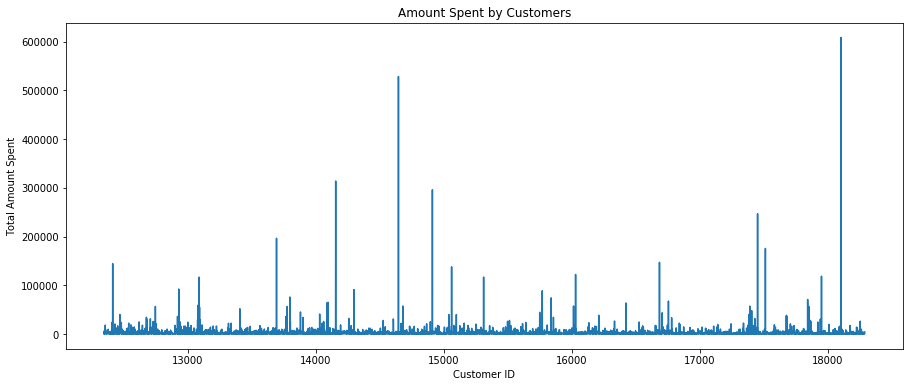

In [40]:
plt.subplots(figsize = (15, 6))
sc = plt.plot(spent_cust.cust_id, spent_cust.spent)
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')
plt.title('Amount Spent by Customers')
plt.show()

In [41]:
spent_cust.sort_values(by = 'spent', ascending = False).head()

,cust_id,country,spent
5705,18102.0,United Kingdom,608821.65
2290,14646.0,Netherlands,528602.52
1802,14156.0,EIRE,313946.37
2551,14911.0,EIRE,295972.63
5063,17450.0,United Kingdom,246973.09


In [42]:
retail.tail()

invoice country  cust_id stock_code  \
10-11 541905  581587  France  12680.0      22899   
      541906  581587  France  12680.0      23254   
      541907  581587  France  12680.0      23255   
      541908  581587  France  12680.0      22138   
      541909  581587  France  12680.0       POST   

                                         desc  quantity  unit_price  \
10-11 541905     children's apron dolly girl          6        2.10   
      541906    childrens cutlery dolly girl          4        4.15   
      541907  childrens cutlery circus parade         4        4.15   
      541908    baking set 9 piece retrospot          3        4.95   
      541909                          postage         1       18.00   

                            date  spent  year_month  year  month  day  \
10-11 541905 2011-12-09 12:50:00  12.60      201112  2011     12    9   
      541906 2011-12-09 12:50:00  16.60      201112  2011     12    9   
      541907 2011-12-09 12:50:00  16.60      201112  2011     12    9   
      541908 2011-12-09 12:50:00  14.85      201112  2011     12    9   
      541909 2011-12-09 12:50:00  18.00      201112  2011     12    9   

              day_of_week  hour  
10-11 541905            5    12  
      541906            5    12  
      541907            5    12  
      541908            5    12  
      541909            5    12

In [43]:
retail.head()

invoice         country  cust_id stock_code  \
09-10 0  489434  United Kingdom  13085.0      85048   
      1  489434  United Kingdom  13085.0     79323P   
      2  489434  United Kingdom  13085.0     79323W   
      3  489434  United Kingdom  13085.0      22041   
      4  489434  United Kingdom  13085.0      21232   

                                        desc  quantity  unit_price  \
09-10 0  15cm christmas glass ball 20 lights        12        6.95   
      1                   pink cherry lights        12        6.75   
      2                  white cherry lights        12        6.75   
      3         record frame 7" single size         48        2.10   
      4       strawberry ceramic trinket box        24        1.25   

                       date  spent  year_month  year  month  day  day_of_week  \
09-10 0 2009-12-01 07:45:00   83.4      200912  2009     12    1            2   
      1 2009-12-01 07:45:00   81.0      200912  2009     12    1            2   
      2 2009-12-01 07:45:00   81.0      200912  2009     12    1            2   
      3 2009-12-01 07:45:00  100.8      200912  2009     12    1            2   
      4 2009-12-01 07:45:00   30.0      200912  2009     12    1            2   

         hour  
09-10 0     7  
      1     7  
      2     7  
      3     7  
      4     7

In [44]:
#orders per month 

ord_month = retail.groupby(['invoice'])['year_month'].unique().value_counts().sort_index()
ord_month

[200912]    1512
[201001]    1011
[201002]    1104
[201003]    1524
[201004]    1329
[201005]    1377
[201006]    1497
[201007]    1381
[201008]    1293
[201009]    1689
[201010]    2133
[201011]    2587
[201012]    1400
[201101]     986
[201102]     997
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1280
[201109]    1755
[201110]    1929
[201111]    2657
[201112]     777
Name: year_month, dtype: int64

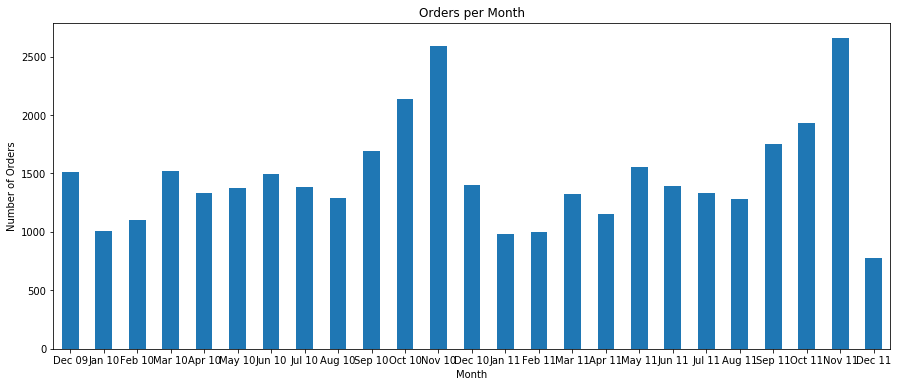

In [45]:
om = ord_month.plot(kind='bar', figsize = (15, 6))
om.set_xlabel('Month')
om.set_ylabel('Number of Orders')
om.set_title('Orders per Month')
om.set_xticklabels(('Dec 09', 'Jan 10', 'Feb 10', 'Mar 10', 'Apr 10', 'May 10', 
                           'Jun 10', 'Jul 10', 'Aug 10', 'Sep 10', 'Oct 10', 'Nov 10', 'Dec 10',
                   'Jan 11', 'Feb 11', 'Mar 11', 'Apr 11', 'May 11', 
                           'Jun 11', 'Jul 11', 'Aug 11', 'Sep 11', 'Oct 11', 'Nov 11', 'Dec 11'), rotation = 'horizontal')
plt.show()                          

In [46]:
# most popular time of the month to order

ord_day = retail.groupby('invoice')['day'].unique().value_counts().sort_index()
ord_day

[1]     1296
[2]     1172
[3]     1073
[4]     1224
[5]     1297
[6]     1279
[7]     1514
[8]     1487
[9]     1250
[10]    1235
[11]    1284
[12]    1083
[13]    1108
[14]    1304
[15]    1285
[16]    1267
[17]    1294
[18]    1258
[19]    1122
[20]    1167
[21]    1243
[22]    1200
[23]    1153
[24]    1185
[25]    1228
[26]    1118
[27]    1063
[28]    1295
[29]    1019
[30]     900
[31]     564
Name: day, dtype: int64

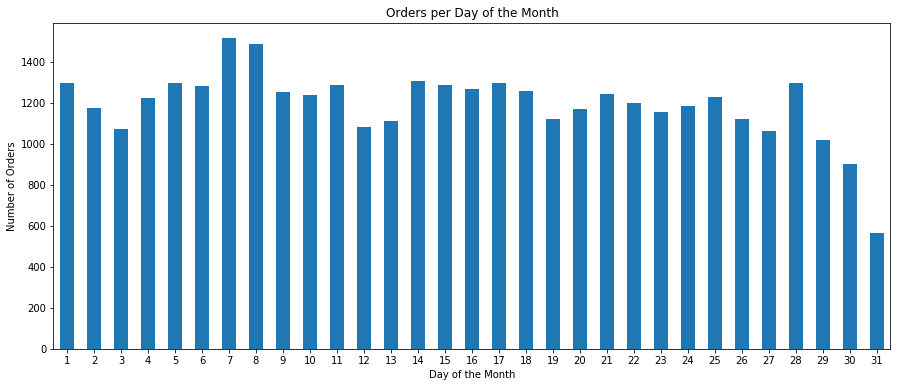

In [65]:
od = ord_day.plot(kind='bar', figsize = (15, 6))
od.set_xlabel('Day of the Month')
od.set_ylabel('Number of Orders')
od.set_title('Orders per Day of the Month')
od.set_xticklabels(labels = [i for i in range (1, 32)], rotation = 'horizontal')
plt.show()                          

In [66]:
# orders per day of the week

ord_dayofweek = retail.groupby('invoice')['day_of_week'].unique().value_counts().sort_index()
ord_dayofweek

[1]    5755
[2]    6626
[3]    6649
[4]    7773
[5]    5386
[6]      30
[7]    4748
Name: day_of_week, dtype: int64

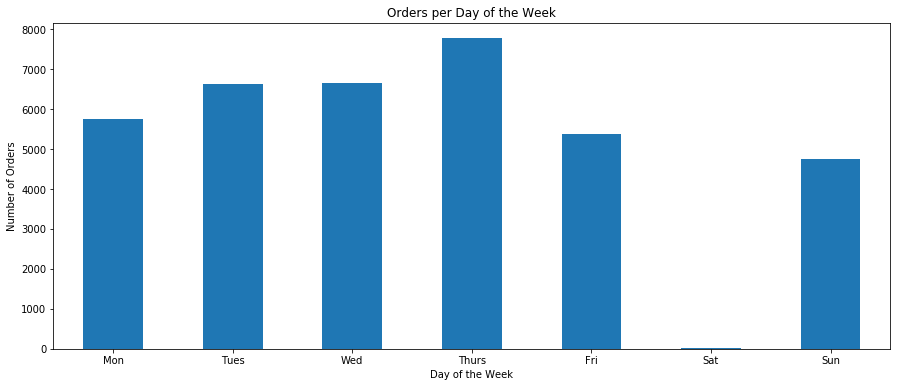

In [67]:
odw = ord_dayofweek.plot(kind='bar', figsize = (15, 6))
odw.set_xlabel('Day of the Week')
odw.set_ylabel('Number of Orders')
odw.set_title('Orders per Day of the Week')
odw.set_xticklabels(labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation = 'horizontal')
plt.show()                          

In [68]:
q_item = retail.groupby(by = ['desc'], as_index = False)['quantity'].sum()
q_item.head()

,desc,quantity
0,doormat union jack guns and roses,169
1,3 stripey mice feltcraft,663
2,4 purple flock dinner candles,340
3,50's christmas gift bag large,1885
4,animal stickers,385


In [69]:
q_item.sort_values(by = 'quantity', ascending = False).head()

,desc,quantity
5167,world war 2 gliders asstd designs,109169
5046,white hanging heart t-light holder,93640
295,assorted colour bird ornament,79913
2392,jumbo bag red retrospot,75759
752,brocade ring purse,71129


In [70]:
item_month = retail.groupby(by = ['desc', 'year_month'], as_index = False)['quantity'].sum()
item_month.sort_values(by = 'quantity', ascending = False).head()

,desc,year_month,quantity
5516,black and white paisley flower mug,201002,19248
8835,brocade ring purse,201009,13853
50510,set/6 woodland paper plates,201003,13099
50502,set/6 woodland paper cups,201003,13062
50468,set/6 strawberry paper cups,201003,13009


In [71]:
item_dayofweek = retail.groupby(by = ['desc', 'day_of_week'], as_index = False)['quantity'].sum()
item_dayofweek.sort_values(by = 'quantity', ascending = False).head()

,desc,day_of_week,quantity
27691,world war 2 gliders asstd designs,4,33334
1596,assorted colour bird ornament,4,22480
27048,white hanging heart t-light holder,2,20900
27050,white hanging heart t-light holder,4,20373
3966,brocade ring purse,5,19842


In [72]:
item_coun = retail.groupby(by = ['desc', 'country'], as_index = False)['quantity'].sum()
item_coun.sort_values(by = 'quantity', ascending = False).head()

,desc,country,quantity
28897,world war 2 gliders asstd designs,United Kingdom,100720
28184,white hanging heart t-light holder,United Kingdom,86327
1637,assorted colour bird ornament,United Kingdom,74256
3800,brocade ring purse,United Kingdom,70725
12697,jumbo bag red retrospot,United Kingdom,69011


In [73]:
retail_sort = retail.sort_values(['cust_id', 'stock_code', 'date'])
retail_sort_shift1 = retail_sort.shift(1)
retail_sort_reorder = retail_sort.copy()

retail_sort_reorder['reorder'] = np.where(retail_sort['stock_code'] == retail_sort_shift1['stock_code'], 1, 0)
retail_sort_reorder.head()

invoice         country  cust_id stock_code  \
09-10 107803  499763  United Kingdom  12346.0    15056BL   
      107802  499763  United Kingdom  12346.0     15056N   
      107804  499763  United Kingdom  12346.0     15056P   
      107801  499763  United Kingdom  12346.0      20679   
      107800  499763  United Kingdom  12346.0      20682   

                                    desc  quantity  unit_price  \
09-10 107803     edwardian parasol black         1        5.95   
      107802   edwardian parasol natural         1        5.95   
      107804      edwardian parasol pink         1        5.95   
      107801       edwardian parasol red         1        5.95   
      107800  red spotty childs umbrella         1        3.25   

                            date  spent  year_month  year  month  day  \
09-10 107803 2010-03-02 13:08:00   5.95      201003  2010      3    2   
      107802 2010-03-02 13:08:00   5.95      201003  2010      3    2   
      107804 2010-03-02 13:08:00   5.95      201003  2010      3    2   
      107801 2010-03-02 13:08:00   5.95      201003  2010      3    2   
      107800 2010-03-02 13:08:00   3.25      201003  2010      3    2   

              day_of_week  hour  reorder  
09-10 107803            2    13        0  
      107802            2    13        0  
      107804            2    13        0  
      107801            2    13        0  
      107800            2    13        0

In [74]:
rsr = pd.DataFrame((retail_sort_reorder.groupby('desc')['reorder'].sum())).sort_values('reorder', ascending = False)
rsr.head()

,reorder
desc,
white hanging heart t-light holder,3691
jumbo bag red retrospot,2120
regency cakestand 3 tier,2114
assorted colour bird ornament,1767
postage,1434


In [75]:
q_up = retail.groupby(by = ['unit_price'], as_index = False)['quantity'].sum()
q_up.sort_values('quantity', ascending = False).head(10)

,unit_price,quantity
93,1.25,1038743
37,0.42,975149
116,1.65,785515
67,0.85,727418
101,1.45,469900
169,2.55,394637
185,2.95,337905
82,1.06,333979
142,2.10,325789
44,0.55,309178


In [76]:
up_arr = np.array(retail.unit_price)
q_arr = np.array(retail.quantity)

np.corrcoef(up_arr, q_arr)

array([[ 1.        , -0.00923511],
       [-0.00923511,  1.        ]])

In [77]:
ord_coun = retail.groupby(['country'])['invoice'].count().sort_values()
ord_coun.head()

country
Saudi Arabia       9
Czech Republic    25
Nigeria           30
Lebanon           45
Korea             53
Name: invoice, dtype: int64

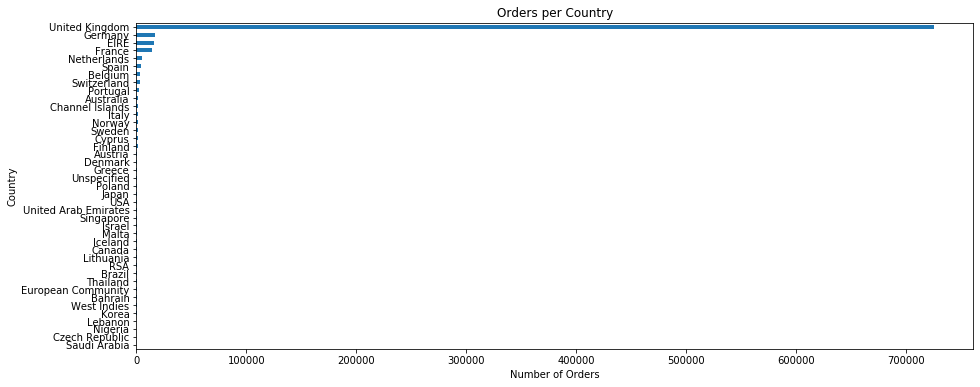

In [78]:
ocoun = ord_coun.plot(kind='barh', figsize = (15, 6))
ocoun.set_xlabel('Number of Orders')
ocoun.set_ylabel('Country')
ocoun.set_title('Orders per Country')
plt.show()     

In [79]:
del ord_coun['United Kingdom']

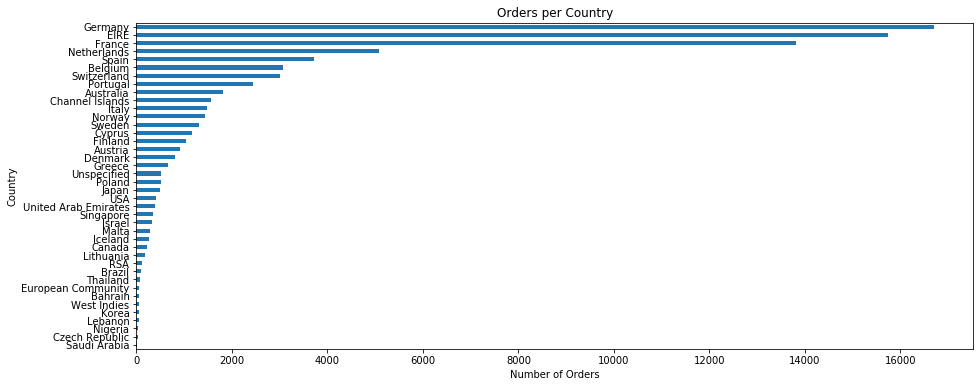

In [80]:
ocoun2 = ord_coun.plot(kind='barh', figsize = (15, 6))
ocoun2.set_xlabel('Number of Orders')
ocoun2.set_ylabel('Country')
ocoun2.set_title('Orders per Country')
plt.show() 

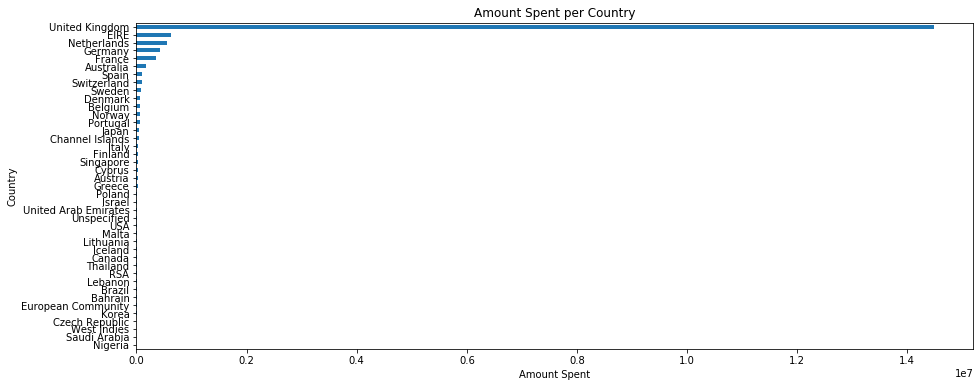

In [81]:
coun_spent = retail.groupby('country')['spent'].sum().sort_values()

cs = coun_spent.plot(kind='barh', figsize = (15, 6))
cs.set_xlabel('Amount Spent')
cs.set_ylabel('Country')
cs.set_title('Amount Spent per Country')
plt.show() 

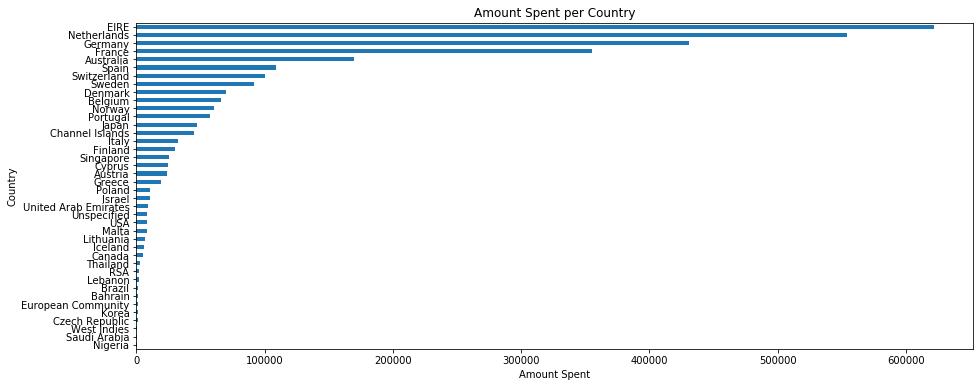

In [82]:
del coun_spent['United Kingdom']

cs2 = coun_spent.plot(kind='barh', figsize = (15, 6))
cs2.set_xlabel('Amount Spent')
cs2.set_ylabel('Country')
cs2.set_title('Amount Spent per Country')
plt.show() 